**Importing the important libraries**

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


**Uploading the test imagge**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving finger.png to finger.png


**Processing**

In [3]:


thresh_value = {}
m = [1]


def Hist(img):
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y


def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y


   
def countPixel(m):
    cnt = 0
    for i in range(0, len(m)):
        if m[i]>0:
           cnt += m[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += m[i]
    return w


def mean(s, e):
    h = 0
    w = wieght(s, e)
    for i in range(s, e):
        h += m[i] * i
    
    return h/float(w)


def variance(s, e):
    v = 0
    h = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - h) **2) * m[i]
    v /= w
    return v
            

def threshold(m):
    cnt = countPixel(m)
    for i in range(1, len(m)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(m))
        wf = wieght(i, len(m)) / float(cnt)
        mf = mean(i, len(m))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            thresh_value[i] = V2w


def get_optimal_threshold():
    min_V2w = min(thresh_value.values())
    optimal_threshold = [k for k, v in thresh_value.items() if v == min_V2w]
    print('Optimal threshold Value', optimal_threshold[0])
    return optimal_threshold[0]




**Generating and ploting the Threshold Image**

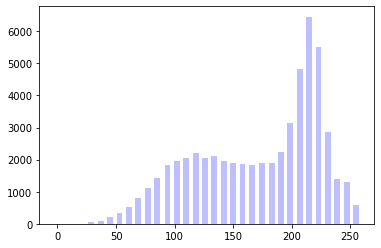

Optimal threshold Value 159


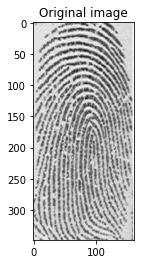

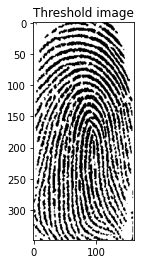

In [4]:
image = Image.open('finger.png').convert("L")
img = np.asarray(image)

m = Hist(img)
threshold(m)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.imshow(image, cmap='gray', vmax=255),plt.title('Original image')
plt.show()
plt.imshow(res, cmap='gray', vmax=255),plt.title('Threshold image')
plt.show()
